# Determining Language Differences Between Interest Groups
**Aditi Vinod & Luke Witten**

## Introduction: []

### Primary Questions
What terms are unique to internet sub-communities, like gamers? \
Based on social media content or messages sent, can an individual be associated with a specific internet sub-community?

### Background Information
Due to the ease of access to the internet, people have been able to find and interact with niche groups that share similar interests to themselves online. Similar to how dialects and accents have formed based on regions in the past, various new words and phrases, exclusive to individual communities, have popped up in sectors of the internet. 

One example of a popular community with a large online presence is gamers. Especially following the recent 2020 COVID-19 pandemic, there has been a significant increase in the past few years in the number of individuals who spend time playing games - both individually and in teams - online. Through content creators (on Twitch, YouTube, TikTok, etc.), online forums, and memes, the English-speaking gaming community likely has one of the most developed subsets of the language to exist; there are a significant number of terms, like "pog," "gg," and "smurf" that have either no significance or mean something different to non-gaming members of society. 

Being able to identify these differences in language helps []

In order to create a list of "gamer words," or terms that are unique to gamers online, and determine whether an individual is a gamer, several steps must be taken: \
1-Collect data that reflects usage of language online in "gamer" communities and "normally" \
2-Compare the two data sets in order to create a list of "gamer words" that did not include unavoidable common words in the English language \
3-Collect data for individual users representing their usage of language \
4-Use the "gamer words" list and the individuals' usage of said gamer words to determine whether they are a gamer or not



1-What is the question you are trying to answer or the story that you are trying you tell?
2-Why is this question or story important?
3-What were the main steps your project made towards answering the question or telling the story?

### Prerequisite Code
The following cell ensures that the necessary functions are imported into the document and that the notebook uses the latest version of all code in the library:

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import WordCloud

from scrape_data import *
from gamer_words import *
from visualize_data import *

import csv
import gamer_words
import os

## Methodology
 
### Data Collection
#### Reddit Data
The data that was collected in order to determine "gamer" and "normal" usage of language on the internet was pulled from Reddit. Reddit was chosen because it is a platform that is used by a significant number of people on the internet across hundreds of sub-communities, represented by subreddits. 
 
Data from Reddit was gathered via the ``PRAW`` API which was used to go through the text present on the top 10000 posts on various given subreddits. Via the ``scrape_subreddits`` function, the text from these submissions was stored in a dictionary where the keys represented each word and the values represented the number of times that said word appeared. Prior to being added into these dictionaries, the text from Reddit was made lowercase and punctuation was removed. The dictionary was then converted into a CSV file, using ``csv_to_dict`` for storage. 
 
Initially, the comments from each post were also being stored; however, ``PRAW`` has limitations regarding how many comments it is capable of parsing at a given time and was unable to handle the sheer amount of comment discourse present on the subreddits chosen for data analysis. As a result, the comment scraping was removed and the number of submissions parsed was increased from the original 2000 to 10000. The number of submissions parsed was determined by increasing it until there no longer significantly affected the program's resulting "gamer words". 
 
While the ``scrape_subreddits``can take in a list of any amount of subreddit names, it was determined that collecting data from five subreddits was ideal. To maintain a similar number of normal subreddits and gamer subreddits, the latter were used as the limiting factor; there is a large dropoff in activity and subscriber count in game specific subreddits after [/r/leagueoflegends](reddit.com/r/leagueoflegends), [/r/pokemon](reddit.com/r/pokemon), and [/r/minecraft](reddit.com/r/minecraft). The combination of these three major game subreddits and the two overall "gaming" subreddits - [/r/gaming](reddit.com/r/gaming) and [/r/games](reddit.com/r/games) - creates a total of five.
 
The subreddits that were chosen for "gaming" and "normal" subreddits were selected based on those with the greatest popularity; this was determined by a combination of number of subscribers and by ensuring that there was still frequent posting present on the subreddits in question. For example, initially, [/r/announcements](reddit.com/r/announcements) was one of the selected "normal" subreddits; however, despite it being the most subscribed to subreddit, there are almost no posts there, so it was replaced. Additionally, subreddits that were primarily centered around images and video, like [/r/aww](reddit.com/r/aww), were excluded. The final gaming subreddits chosen were [/r/gaming](reddit.com/r/gaming), [/r/games](reddit.com/r/games), [/r/leagueoflegends](reddit.com/r/leagueoflegends), [/r/minecraft](reddit.com/r/minecraft), and [/r/pokemon](reddit.com/r/pokemon); the final "normal" subreddits chosen were [/r/iama](reddit.com/r/iama), [/r/askreddit](reddit.com/r/askreddit), [/r/science](reddit.com/r/science), [/r/worldnews](reddit.com/r/worldnews), and [/r/todayilearned](reddit.com/r/todayilearned).
The frequency CSVs from the "gamer" and "normal" subreddits were used to determine a list of gamer-specific words.
 
#### Discord Data
The data that was collected from users was pulled from Discord. Discord is a messaging platform where individuals can join servers, or spaces on discord for individual communities and friend groups, and communicate through various channels, or messaging spaces that are typically split up by different topics or rules within a server. Discord was chosen as messaging is where the most natural usage of individual language occurs; furthermore, there was easy access with multiple servers containing between 150-14000 messages per individual. 
 
Data from eighteen users was collected from one server that had no primary purpose other than being a means of communication between friends. Data from six additional users was collected from a different server that was dedicated to gaming, specifically Minecraft. All users in question were briefed on what data would be collected and how it would be used prior to giving consent. 
 
The ``collect`` command takes in either a user, or assumes the user calling the command in the server if none is specified, and parses through all of their messages in every channel in order to create a frequency dictionary of the words that they have sent. Like the Reddit data collected, all of the words are made lowercase and most punctuation is removed. The frequency dictionary is then turned into a CSV and automatically saved with Discord username as the file name. For the sake of privacy, the generated names have been modified in this implementation.
The frequency CSVs from the users were used to determine which users would be considered "gamers" based on their gamer word versus normal word usage.

### Data Processing
Now that we have our data (conveniently stored as CSV's) we can actually start analyzing our data.

Storing our data in this form means that we do not need to re-scrape the data from Reddit every time we want to analyze it, but it also means that the data is not readily accessible by the computer.

Luckily reading data from a CSV is not difficult, using the function `csv_to_dict` we can easily convert from a CSV file to a dictionary in python.

In [2]:
gamer_dictionary = csv_to_dict("gaming.csv")
print(f"The length of the dictionary is {len(gamer_dictionary)}")

The length of the dictionary is 17741


We now have access to a dictionary that tells us how many times a word is used in the dataset we collected, but many of these words appear only once or are typos. These results are not particularly useful as we want words that are commonly used by gamers.

Since we are removing undesireable data, we can also remove "words" that are far too long like urls and other specific typos at the same time.

We can remove words from the dataset which are not desireable to analyze using `remove_too_uncommon()`. 

In [3]:
# Create a new dictionary with only words that appear 3 or more times
gamer_dictionary_1 = remove_too_uncommon(gamer_dictionary.copy(),3)
print(f"The length of the dictionary is {len(gamer_dictionary_1)}.")

The length of the dictionary is 5056.


This dataset is much smaller than the original and likely more representative of words what gamers actually say. 

If we want to find out which words gamers use most, then all we need to do is find which words appear most frequently in the dataset. Once we have these "gamer words" we can compare them against a user's post history to find out if they are a gamer or not.

Let's run `find_most_frequent()` to find the 5 most frequently occuring "gamer words"

In [4]:
gamer_dictionary_2 = find_most_frequent(gamer_dictionary_1.copy(),5)
print(f"The five most frequent gamer words are {gamer_dictionary_2}.")

The five most frequent gamer words are {'the': 6782, 'to': 4346, 'and': 3521, 'a': 3467, 'of': 3003}.


Looking at the words that appeared we can see that something is obviously wrong. While there is no doubt that gamers use words like "a", "and", and "the" frequently, nobody would be fooled into believing that these words are unique to the gamer vocabulary. 

To fully determine what words are unique to the gamer vocabulary, we will need to somehow compare the language dataset from gamers to a language dataset for non-gamers.

For our convenience, this data has already been scraped and is stored in `normal.csv`

~ aditi put something here about our methodology from scraping normal subreddits and what normal subreddits we scraped from~

To filter out words from both dictionaries we can go through each word in the gamer dictionary and compare how frequently a word occurrs in both dictionaries. If a word is used too similarly in both language sets then we can remove the word from both. 

Unfortunately, our dictionary currently stores the number of times a word has been used in a language set and not the percentage of times that a word is used in the entire language set. This is a simple enough thing to code though, and now exists in the form of the `instances_to_decimal` function. This function also outputs the number of total word usages in the entire dictionary it acts on as this is information is inaccessible after we convert it to this form.

In [5]:
# Create and store the normal dictionary
normal_dictionary = csv_to_dict("normal.csv")

# Remove infrequent words
normal_dictionary_1 = remove_too_uncommon(normal_dictionary.copy(),3)
#switch the normal and gamer dictionaries from tracking the number of times 
#a word has been used to the frequency that a user uses that words
#for later functions it is also desirable if this function outputs the total
#usages of words in the original dictionary
gamer_decimal_dictionary, gamer_dict_total_words = instances_to_decimal(gamer_dictionary_1.copy())
normal_decimal_dictionary, normal_dict_total_words = instances_to_decimal(normal_dictionary_1.copy())

the_usages = gamer_dictionary_1["the"]
the_decimal = gamer_decimal_dictionary["the"]
print(f"\"the\" is used {the_usages} times in the gamer dictionary.")
print(f"\"the\" is used {the_decimal} of the time in the gamer language set.")

"the" is used 6782 times in the gamer dictionary.
"the" is used 0.0482409343746888 of the time in the gamer language set.


Now that we have our data in a usable form, we can parse through our two language sets and remove words that appear a similar percentage of the time in both data sets. While we do not want to be analyzing words that are fundamental to human speech (things like conjunctions, pronouns, the word "the") because they will likely be used about as much by gamers and non gamers, meaning that they do not represent very valuable data for us to analyze. Conversely, we do not want to remove all "normal" seeming words because if for some reason gamers tend to use the word "they" 70% more than average, then that will be valuable data even though "they" is obviously not a gamer specific word.

While the actual percentage value that is used for this process is arbitrary, we found that removing words with frequency values within +- 25% of each other worked well to differentiate and remove words from our data set as it removes a substantial amount of minimally useful data while still leaving a robust dataset to analyze.

We can use the function `remove_most_common()` to parse our two dictionaries with respect to each other and even output a list of words that were removed from both sets, which will be useful when we parse through individual user data later.

In [6]:
normal_decimal_dictionary_1, gamer_decimal_dictionary_1, ignore_list = remove_most_common(normal_decimal_dictionary,gamer_decimal_dictionary,normal_dict_total_words,gamer_dict_total_words)
print(f"The length of the dictionary is {len(gamer_decimal_dictionary_1)}.")

The length of the dictionary is 4325.


While we now have two curated language sets, one for the gamer language set and one for the normal language set, we still do not have a method for determining what words are extremely specific to the gamer lexicon. 

To do this, we can examine all words that appear in both the gamer and the normal dataset, if the word is used 8 times more frequently in the gamer language set than the normal language set, then we can determine it is a gamer word. While this 8x threshold is undoubtedly arbitrary, in testing we found that this value produced a good number of gamer words that were not too over specific but also not too common as to not be considered gamer specific.

Sometimes possible gamer words do not appear at all in the normal language set, so there needs to be a method for these words to become gamer words as well. We foudn that in testing, if a word does not appear in both data sets and its frequency of occurrences values is over .000079 then it can be reasonably considered a gamer word. While this value of .000079 is also arbitrary, we found that this in addition to the 8x threshold we used earlier creates a set of words that are specific to the gamer lexicon.

Using our curated data sets, we can find a number of "gamer words" using the `determine_gamer_words()` function.

In [7]:
gamer_words_1 = determine_gamer_words(normal_decimal_dictionary_1,gamer_decimal_dictionary)
print(f"There are {len(gamer_words_1)} gamer words.")

There are 614 gamer words.


Now our data analysis is nearly complete. First, for brevity, we should create a function that uses all of the functions we created earlier and automatically curates a data set for us and finds our "gamer words". This is what the `parse_words()` function does.

Since one of our goals is to determine whether or not a user is a gamer or not, we will need some way of comparing a user's language usage dataset to our gamer and normal language datasets. This is what the `determine_language_similarity()` function does.

While a technical description of this function and why it works can be found in the function docstring, what is important to know for now is that this function determines how similar two language sets are by imagining each language set as a vector. The lower the output of this function is, the closer two language sets are to each other. While the output of this function does not mean much conceptually to us on its own, when compared against the values of other users this information will become more useful.

In [8]:
#load user data and convert it into a usable form
user_language_dictionary = csv_to_dict("anonymous_data/user6.csv")
user_language_dictionary, user_total_uses = instances_to_decimal(user_language_dictionary)
#determine a closeness value for a user and the gamer language
language_closeness_value = determine_language_similarity(gamer_decimal_dictionary_1,user_language_dictionary)

print(f"the user dataset and gamer dataset are {language_closeness_value} close")

the user dataset and gamer dataset are 0.08083591714611661 close


Now that we are able to determine how similar a user's language is to another language set, we can start analyzing data. It would be useful if we could sweep through all of our user profiles and determine how close a user's language is to our normal language set and our gamer language set. It would also be interesting to see what ratio of the time a user uses a "gamer word" in conversation to the total words they use. 

The `analyze_users_language()` function does just this, outputting a dictionary for each user where the value of the dictionary is a list with all three of the above values. The function also removes all words from the user's dataset that we deliberately removed in `remove_most_common()`.

In [9]:
folder_path = "anonymous_data"
user_value_dictionary = analyze_users_language(normal_decimal_dictionary_1,gamer_decimal_dictionary_1,\
    gamer_words_1, ignore_list, folder_path)
user_2_analysis = user_value_dictionary["anonymous_data/user2.csv"]
print(f"user 2's closeness values and gamer word ratio are {user_2_analysis}")

user 2's closeness values and gamer word ratio are [0.03275724882067993, 0.03387020029531926, 0.003691261250051613]


In [10]:
folder_path = "anonymous_data"
pars = parse_words(normal_dictionary_1, gamer_dictionary_1, 10)
dict_test = analyze_users_language(pars[0], pars[1], pars[2], pars[3], folder_path)
stats = stats_lists(dict_test, folder_path)

## Results

At least three substantially different visualizations are shown.
Where applicable, each visualization has a title, axis labels, units, and a legend.
Each visualization supports a point made in the text of this section.
Each visualization is formatted to effectively and appropriately convey information (e.g., using a suitable plot type and not using misleading axis limits or scales).

### Visualization

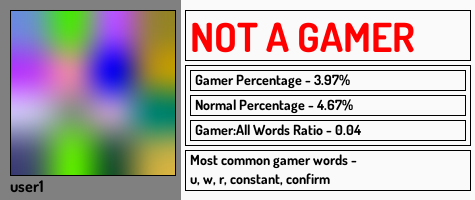

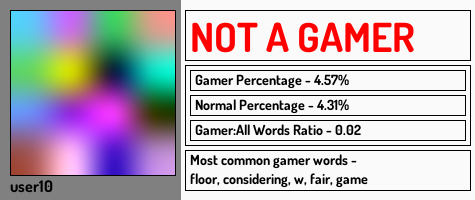

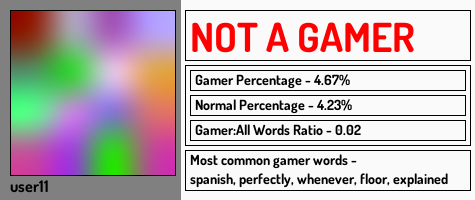

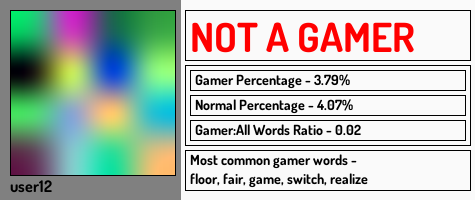

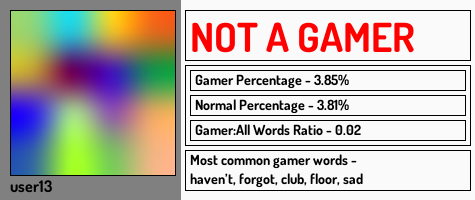

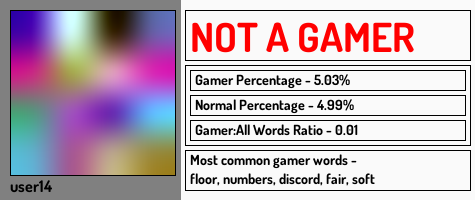

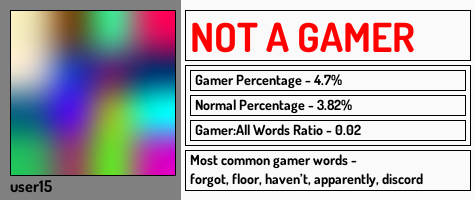

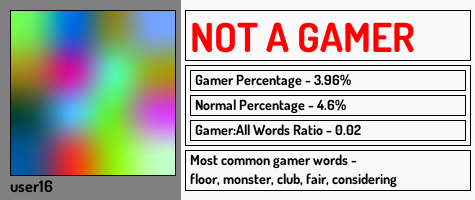

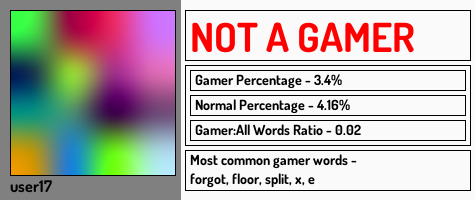

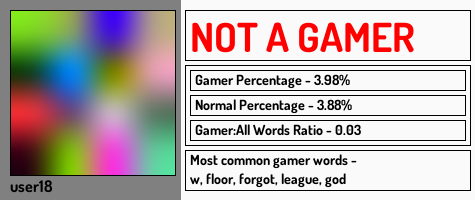

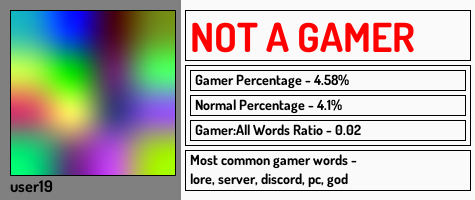

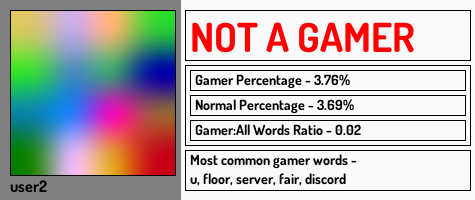

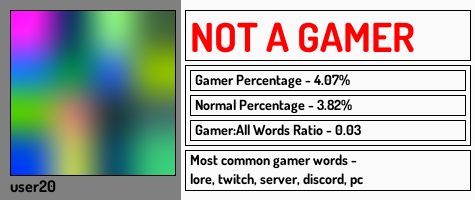

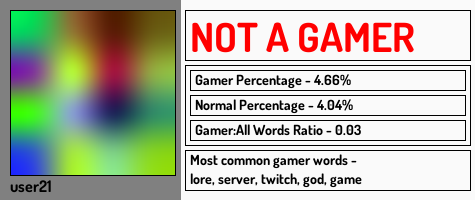

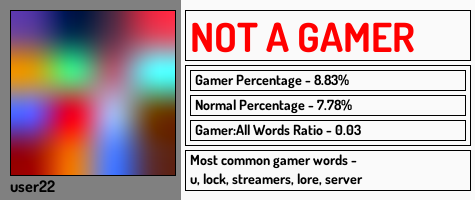

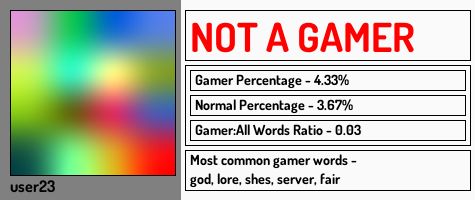

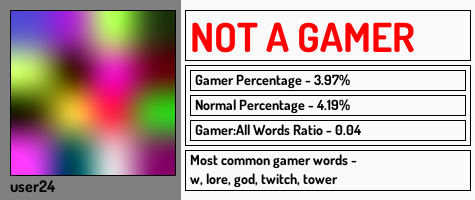

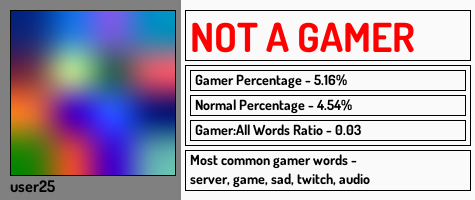

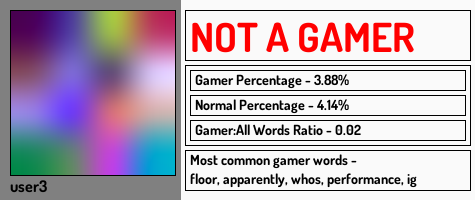

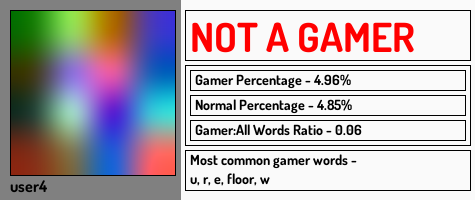

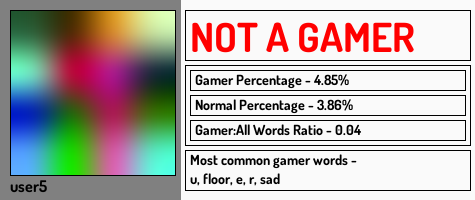

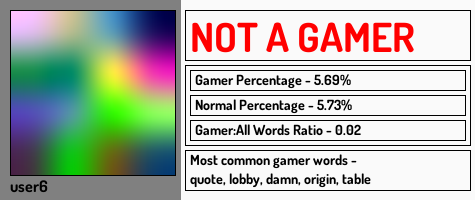

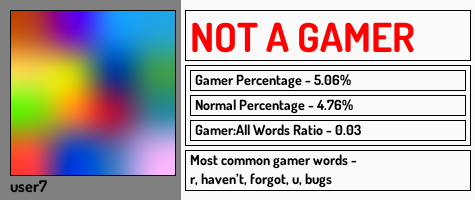

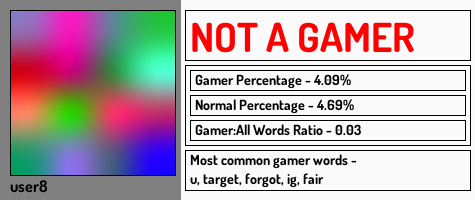

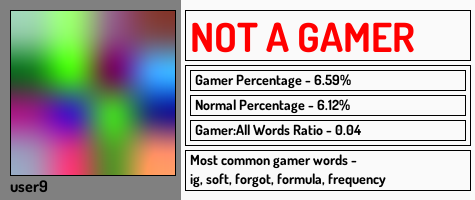

In [11]:
file_list = get_file_list(folder_path)
dict_test2 = analyze_users_language(pars[0], pars[1], pars[2], pars[3], folder_path)


user_id_dict = {}

for user in file_list:
    username = str(user)[len(str(folder_path))+1:-4]
    gamer_freq = dict_test2[user][1]
    normal_freq = dict_test2[user][0]
    gamer_status = is_gamer(gamer_freq, normal_freq)
    gamer_all_freq = dict_test2[user][2]
    top = list(find_most_frequent_gamer_words(csv_to_dict(user), pars[2], 5).keys())

    id_info = [username, gamer_status, gamer_freq, normal_freq, gamer_all_freq, top]
    user_id_dict[user] = id_info

for user in file_list:
    create_profile_image(user_id_dict[user][0], user_id_dict[user][1], user_id_dict[user][2], user_id_dict[user][3], user_id_dict[user][4], user_id_dict[user][5])

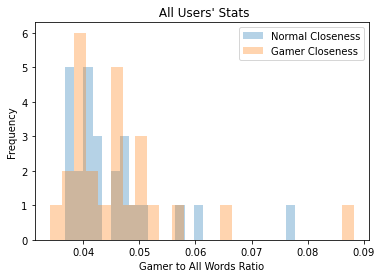

In [12]:
bins = len(stats[0])
#histogram(stats[0], bins, "Normal Closeness", "Frequency of Users' Normal Closeness")
#plt.show()
#histogram(stats[1], bins, "Gamer Closeness", "Frequency of Users' Gamer Closeness")
#plt.show()
#histogram(stats[2], bins, "Gamer to All Words Ratio", "Frequency of Gamer to All Words Ratio")
#plt.show()
stacked_histogram(stats, bins, "Normal Closeness", "Gamer Closeness", "Gamer to All Words Ratio", " All Users' Stats")

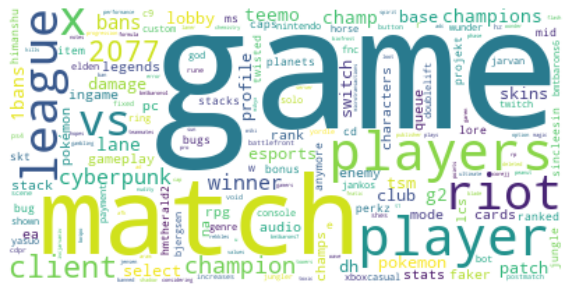

In [13]:
gamer_words_freq = Counter(determine_gamer_words_frequency(pars[0], pars[1]))
word_cloud(gamer_words_freq)

test_pull_issue = "1234sfdoisafdhuhufsdahjsadfjklasdjsakjfdsjadsfkfsadjasdf"

### Analysis/Interpretation

The essay draws reasonably sound conclusions from the results.
The essay describes important insights and lessons from this project.
The essay addresses any contextual or ethical implications of the project.
The essay reflects on the project work, addressing difficulties and potential future work.

## Conclusion

Through our data analysis we have provided a method with which one can quantify and compare different language sets, find words specific to a language or community, and identify members of the community using language frequency patterns. It is possible to group people by the things they do, say, and type.

While the purpose of this analysis, determining specific "gamer" vocabulary and finding out whether someone is a "gamer" or not, is a silly and fun question, the theory behind this analysis and detection of users in communities could be used for more serious and potentially ethicially dubious uses. While it seems far off given the context of this essay, this exact code could be used to classify people as protestors by authoritarian regimes or automatically find toxic users in an online forum given the requisite data. The fact that our code can act as a classifier for individuals given nothing but the words somebody has typed could make this an incredibly powerful tool for anyone trying to moderate or systematically discriminate against people.

As programmers, we feel that more than anything we learned how to scope our own software projects, scrape data using an API, systematically curate large amounts of data, and create images automatically using software. Both of us feel like we are substantially more proficient at teaming in software projects and would know better how to colaborate on a project of this scale and scope in the future, particularly with using git and maintaining documentation so that our partners can easily collaborate on the code that the other wrote.

The main pain points of this project came in the form of dealing with API limitations, having to write mass amounts of documentation for the main and helper functions we created, dealing with creating unit tests without a template, and having to retroactively change several functions to implement new features. If we were to start over on this project, we are confident that we would be better about actively writing documentation, test functions, and possibly would restructure our dataset to use dataframes instead of multiple dictionaries.

If we were to extend this project, we would likely go about acquiring much more, and more statistically soundly collected data from users. The way we are determining gamers now involves utilizing z scores from users representing how closely their language usage aligns with the gamer and normal language sets. It would be interesting to gather data from a wide range of people who we knew were either gamers or not gamers and refactor our method for determining whether someone is a gamer through more statistically significant means. We have also discussed the possibility of using machine learning to optimize some of the more arbitrary values we have chosen to optimize the data curation and gamer word detection portions of our code. We would also like to run the code for different interests groups and possibly use it to determine something like political affiliation or age.

